In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
dataset = pd.read_csv('/content/Naive-Bayes-Classification-Data.csv')
X = dataset.iloc[:, :-1].values  # Features: glucose, bloodpressure
y = dataset.iloc[:, -1].values    # Target variable: diabetes

In [5]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Create the Naive Bayes classifier
classifier = GaussianNB()

# Train the model
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predict the results
y_pred = classifier.predict(X_test)

In [9]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[86  7]
 [ 7 99]]


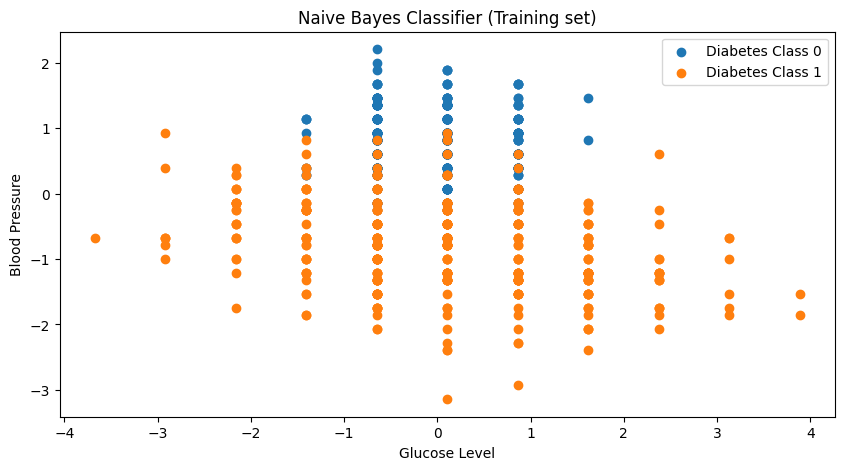

In [10]:
# Visualising the Training set results
plt.figure(figsize=(10, 5))
for i in range(2):  # Loop through classes
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Diabetes Class {i}')

plt.title('Naive Bayes Classifier (Training set)')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

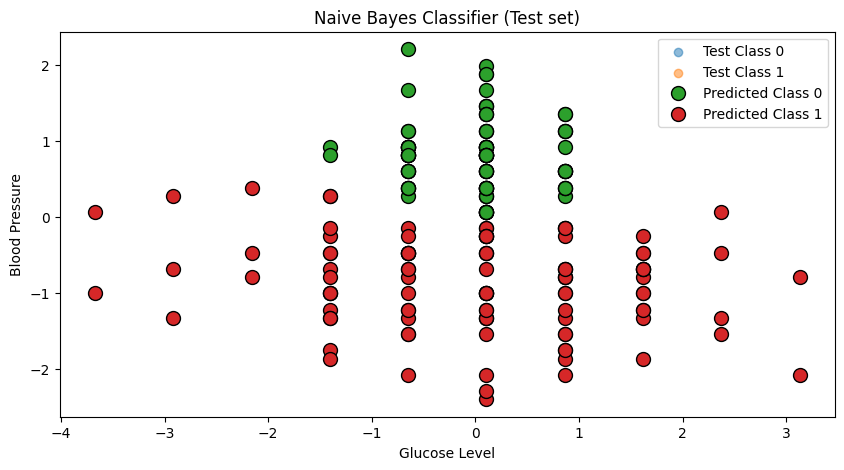

In [11]:
# Visualising the Test set results
plt.figure(figsize=(10, 5))
for i in range(2):  # Loop through classes
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Test Class {i}', alpha=0.5)

# Plot the predicted results
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], label='Predicted Class 0', edgecolor='black', s=100)
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], label='Predicted Class 1', edgecolor='black', s=100)

plt.title('Naive Bayes Classifier (Test set)')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()